#**Ekstraksi Kata Kunci (PAGE RANK)**

##Import Modul

In [1]:
import pandas as pd
import numpy as np

##Menampilkan Data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/PPW/TUGAS/Data Berita newsdetik.csv")
df

,Judul,Tanggal,Artikel,Category
0,"Gus Imin Janjikan Khitan Ditanggung JKN, BPJS ...","Senin, 27 Nov 2023 13:44 WIB",Cawapres nomor urut 1 Muhaimin Iskandar atau G...,Finance
1,Kementerian BUMN Punya Solusi Selamatkan Waski...,"Senin, 27 Nov 2023 13:43 WIB",Saham PT Waskita Karya (Persero) Tbk terancam ...,Finance
2,"Sedot Sepertiga Uang Negara, Pemda Diminta Mel...","Senin, 27 Nov 2023 13:33 WIB","Menteri Keuangan, Sri Mulyani Indrawati, menje...",Finance
3,Pertagas Raih Gold Rating di Ajang Asia Sustai...,"Senin, 27 Nov 2023 13:31 WIB",PT Pertamina Gas (Pertagas) yang merupakan bag...,Finance
4,Petani Tembakau Jabar Ramai-ramai Tolak Aturan...,"Senin, 27 Nov 2023 13:28 WIB",Ratusan petani dan komunitas pertembakauan di ...,Finance
...,...,...,...,...
1617,"Seandainya Ada Team Order dari Ducati, Jorge M...","Senin, 09 Okt 2023 20:10 WIB",Persaingan ketat di antara Francesco Bagnaia d...,Sport
1618,"Yamaha Mau VR46 Racing Jadi Tim Satelit, tapi...","Senin, 09 Okt 2023 19:30 WIB",Yamaha ingin mempunyai tim satelit lagi musim ...,Sport
1619,Tim Kempo Indonesia Sabet 4 Emas di Kejuaraan ...,"Senin, 09 Okt 2023 18:50 WIB",Tim Kempo Indonesia bersinar di Negeri Sakura ...,Sport
1620,Jadwal MotoGP Mandalika Akhir Pekan Ini,"Senin, 09 Okt 2023 18:15 WIB",Jadwal MotoGP Mandalika akhir pekan ini bisa d...,Sport


##Pre Processing

Menghilangkan Data Yang Kosong

In [3]:
df.isnull().sum()

Judul       0
Tanggal     0
Artikel     0
Category    0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [6]:
df = df.drop_duplicates(subset=['Judul', 'Artikel'])
df

,Judul,Tanggal,Artikel,Category
0,"Gus Imin Janjikan Khitan Ditanggung JKN, BPJS ...","Senin, 27 Nov 2023 13:44 WIB",Cawapres nomor urut 1 Muhaimin Iskandar atau G...,Finance
1,Kementerian BUMN Punya Solusi Selamatkan Waski...,"Senin, 27 Nov 2023 13:43 WIB",Saham PT Waskita Karya (Persero) Tbk terancam ...,Finance
2,"Sedot Sepertiga Uang Negara, Pemda Diminta Mel...","Senin, 27 Nov 2023 13:33 WIB","Menteri Keuangan, Sri Mulyani Indrawati, menje...",Finance
3,Pertagas Raih Gold Rating di Ajang Asia Sustai...,"Senin, 27 Nov 2023 13:31 WIB",PT Pertamina Gas (Pertagas) yang merupakan bag...,Finance
4,Petani Tembakau Jabar Ramai-ramai Tolak Aturan...,"Senin, 27 Nov 2023 13:28 WIB",Ratusan petani dan komunitas pertembakauan di ...,Finance
...,...,...,...,...
1617,"Seandainya Ada Team Order dari Ducati, Jorge M...","Senin, 09 Okt 2023 20:10 WIB",Persaingan ketat di antara Francesco Bagnaia d...,Sport
1618,"Yamaha Mau VR46 Racing Jadi Tim Satelit, tapi...","Senin, 09 Okt 2023 19:30 WIB",Yamaha ingin mempunyai tim satelit lagi musim ...,Sport
1619,Tim Kempo Indonesia Sabet 4 Emas di Kejuaraan ...,"Senin, 09 Okt 2023 18:50 WIB",Tim Kempo Indonesia bersinar di Negeri Sakura ...,Sport
1620,Jadwal MotoGP Mandalika Akhir Pekan Ini,"Senin, 09 Okt 2023 18:15 WIB",Jadwal MotoGP Mandalika akhir pekan ini bisa d...,Sport


###Cleaning

##Mengambil contoh 1 data

In [13]:
df

,Judul,Tanggal,Artikel,Category
0,"Gus Imin Janjikan Khitan Ditanggung JKN, BPJS ...","Senin, 27 Nov 2023 13:44 WIB",cawapres nomor urut muhaimin iskandar atau gus...,Finance
1,Kementerian BUMN Punya Solusi Selamatkan Waski...,"Senin, 27 Nov 2023 13:43 WIB",saham pt waskita karya persero tbk terancam di...,Finance
2,"Sedot Sepertiga Uang Negara, Pemda Diminta Mel...","Senin, 27 Nov 2023 13:33 WIB",menteri keuangan sri mulyani indrawati menjela...,Finance
3,Pertagas Raih Gold Rating di Ajang Asia Sustai...,"Senin, 27 Nov 2023 13:31 WIB",pt pertamina gas pertagas yang merupakan bagia...,Finance
4,Petani Tembakau Jabar Ramai-ramai Tolak Aturan...,"Senin, 27 Nov 2023 13:28 WIB",ratusan petani dan komunitas pertembakauan di ...,Finance
...,...,...,...,...
1617,"Seandainya Ada Team Order dari Ducati, Jorge M...","Senin, 09 Okt 2023 20:10 WIB",persaingan ketat di antara francesco bagnaia d...,Sport
1618,"Yamaha Mau VR46 Racing Jadi Tim Satelit, tapi...","Senin, 09 Okt 2023 19:30 WIB",yamaha ingin mempunyai tim satelit lagi musim ...,Sport
1619,Tim Kempo Indonesia Sabet 4 Emas di Kejuaraan ...,"Senin, 09 Okt 2023 18:50 WIB",tim kempo indonesia bersinar di negeri sakura ...,Sport
1620,Jadwal MotoGP Mandalika Akhir Pekan Ini,"Senin, 09 Okt 2023 18:15 WIB",jadwal motogp mandalika akhir pekan ini bisa d...,Sport


##Cleaning

re.sub ['^a-zA-Z\s'] ini akan menghapus semua karakter non-abjad (tidak termasuk spasi) dari teks masukan.

In [26]:
#Remove Puncutuation
clean_symbol = re.compile('[^a-zA-Z\s]')
def clean_punct(text):
    text = clean_symbol.sub(' ', text).lower()
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation
preprocessing = df['Artikel'].apply(clean_punct)
clean=pd.DataFrame(preprocessing)
clean

,Artikel
0,cawapres nomor urut muhaimin iskandar atau gus...
1,saham pt waskita karya persero tbk terancam di...
2,menteri keuangan sri mulyani indrawati menjela...
3,pt pertamina gas pertagas yang merupakan bagia...
4,ratusan petani dan komunitas pertembakauan di ...
...,...
1617,persaingan ketat di antara francesco bagnaia d...
1618,yamaha ingin mempunyai tim satelit lagi musim ...
1619,tim kempo indonesia bersinar di negeri sakura ...
1620,jadwal motogp mandalika akhir pekan ini bisa d...


##Tokenization

In [20]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('popular')


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [21]:
df['isi_tokens'] = df['Artikel'].apply(lambda x: word_tokenize(x))
df[["Artikel", "isi_tokens"]].head()

<ipython-input-21-b3de154fa2c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isi_tokens'] = df['Artikel'].apply(lambda x: word_tokenize(x))


,Artikel,isi_tokens
0,cawapres nomor urut muhaimin iskandar atau gus...,"[cawapres, nomor, urut, muhaimin, iskandar, at..."
1,saham pt waskita karya persero tbk terancam di...,"[saham, pt, waskita, karya, persero, tbk, tera..."
2,menteri keuangan sri mulyani indrawati menjela...,"[menteri, keuangan, sri, mulyani, indrawati, m..."
3,pt pertamina gas pertagas yang merupakan bagia...,"[pt, pertamina, gas, pertagas, yang, merupakan..."
4,ratusan petani dan komunitas pertembakauan di ...,"[ratusan, petani, dan, komunitas, pertembakaua..."


##Stopwords

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian')))
df['isi_tokens'] = df['isi_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

<ipython-input-23-2222164fe06e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isi_tokens'] = df['isi_tokens'].apply(lambda x: [w for w in x if not w in stop_words])


In [19]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('popular')

# Menghitung matriks co-occurrence dengan CountVectorizer
vectorizer = CountVectorizer()
co_occurrence_matrix = vectorizer.fit_transform(df['Artikel']).T * vectorizer.fit_transform(df['Artikel'])

# Membuat DataFrame dari matriks co-occurrence
df_co_occurrence = pd.DataFrame(co_occurrence_matrix.toarray(), columns=vectorizer.get_feature_names_out(),index=vectorizer.get_feature_names_out())
df_co_occurrence

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

NameError: ignored

##Plot Graph

In [ ]:
G = nx.Graph()
for idx, row in df_co_occurrence.iterrows():
    for col in df_co_occurrence.columns:
        weight = df_co_occurrence.loc[idx, col]
        if weight > 5 and idx != col:
            G.add_edge(idx, col, weight=weight)

Pembentukan Graph : Setiap kata yang memiliki hubungan dengan kata lain dan nilai Term frequency lebih dari 5 akan dibentuk node yang saling terhubung

##Page Rank

**Pagerank** digunakan untuk menghitung nilai pentingnya suatu kata dalam dokumen.

Graph yang sudah terbentuk akan di hitung nilai pageranknya, dan diambil 3 kata yang memiliki nilai pagerank tertinggi.

In [ ]:
pr = nx.pagerank(G)
sorted_d = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:3]
sorted_d

[('khitan', 0.08407461269987435),
 ('medis', 0.08407461269987435),
 ('khitanan', 0.07522646709495237)]

##Graph dengan TF lebih dari 5

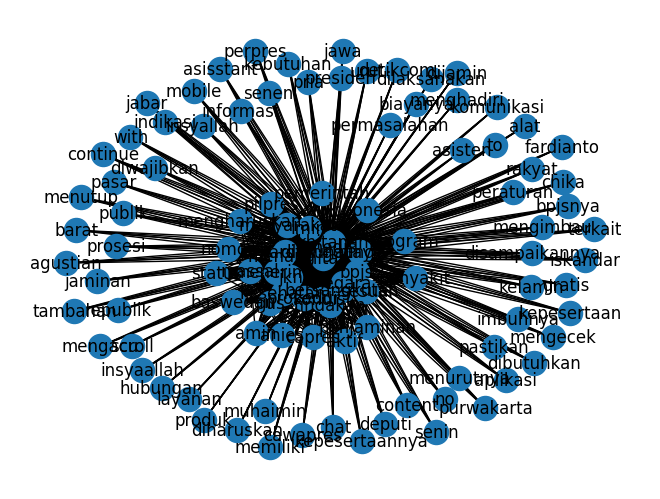

In [ ]:
nx.draw(G,with_labels=True)